## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

## Loading Data set

In [2]:
data = pd.read_csv('FuelConsumption.csv')

In [3]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Slicing Data to check for Correlation

In [4]:
engine_size_co2_emissions = data[['ENGINESIZE', 'CO2EMISSIONS']]

In [5]:
engine_size_co2_emissions.sample(7)

,ENGINESIZE,CO2EMISSIONS
947,2.0,179
796,1.6,207
971,2.5,138
601,1.8,191
821,2.0,267
190,3.6,242
1038,2.0,207


In [6]:
data_corre = engine_size_co2_emissions.corr()
data_corre

,ENGINESIZE,CO2EMISSIONS
ENGINESIZE,1.000000,0.874154
CO2EMISSIONS,0.874154,1.000000


## Correlation value between the CO2 emission and the engine size

In [7]:
data['ENGINESIZE'].corr(data['CO2EMISSIONS'])

0.8741543683958121

The Two values seem to be closely correlated but I don't 
think the engine size can be taken as a unique predictor for the CO2 emission.

## Plot of CO2 emission with respect to the engine size

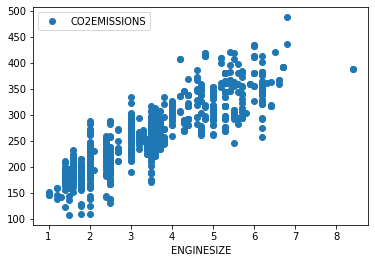

In [8]:
engine_size_co2_emissions.plot(x='ENGINESIZE', y='CO2EMISSIONS', style='o')

I think a linear regression model would fit very well here.

## Data Preparation for Linear regression

In [9]:
X = data['ENGINESIZE'].values.reshape(-1,1)
y = data['CO2EMISSIONS'].values.reshape(-1,1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
print(regressor.intercept_)

[125.07790675]


In [13]:
print(regressor.coef_)

[[39.85725417]]


In [14]:
print(regressor.intercept_[0] + regressor.coef_[0][0] * 1)

164.93516092029964


## If an engine size is increased by 1 L, what would be the CO2 emission increase as predicted by your model? 

In [15]:
print(regressor.predict([[1]]))

[[164.93516092]]


## Plot of the fit line over the data.

In [16]:
max_engine_size = data["ENGINESIZE"].max()

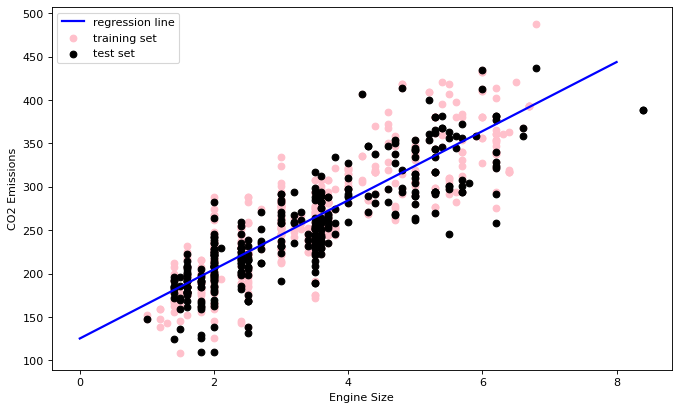

In [17]:
X_plot = np.arange(0,max_engine_size,1).reshape(-1, 1)
y_plot = regressor.predict(X_plot)

plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(X_train, y_train, c='pink', label='training set')
plt.scatter(X_test, y_test, c='black', label='test set')
plt.plot(X_plot, y_plot, c='blue', label='regression line', linewidth=2)
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.legend()
plt.show()

In [18]:
y_pred = regressor.predict(X_test)
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 373781.28
Mean absolute error (MAE): 24.86
Mean square error (MSE): 1049.95
Root mean square error (RMSE): 32.40


## Residual Plots

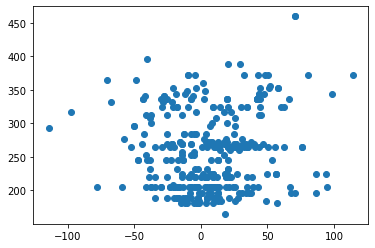

In [19]:
residuals = y_pred - y_test
plt.scatter(residuals,y_pred)
plt.show()

## Model accuracy.

In [20]:
regressor.score(X_test,y_test)

0.7323694811043888

## Training  linear regression model exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB)

In [21]:
X = data['FUELCONSUMPTION_COMB'].values.reshape(-1,1)
y = data['CO2EMISSIONS'].values.reshape(-1,1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [23]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Model accuracy based exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB).

In [24]:
regressor.score(X_test,y_test)

0.7780408576143314

## My Deduction from the difference in model accuracy

The Linear regression model with FUELCONSUMPTION_COMB is more accurate than that of ENGINESIZE.
This can be concluded as, in order to better predict the level of CO2EMISSIONS, 
we should use ENGINESIZE since it has a higher prediction score   